In [1]:
from models import *
from used_packages import *
from utils import *

In [2]:
data_bank = pd.read_csv('data/bs140513_032310.csv').drop(columns=['zipcodeOri', 'zipMerchant'])

In [3]:
data_bank.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [4]:
# removing single quotes
object_columns = data_bank.select_dtypes('object').columns
for col in object_columns:
    data_bank[col] = data_bank[col].str.replace("'", "")
data_bank

# removing es_ from category
data_bank['category'] = data_bank['category'].str.replace('es_', '')

In [5]:
best_recall = dict()

In [6]:
from collections import defaultdict
scores_plot = defaultdict(float)

In [7]:
data_bank.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,transportation,4.55,0
1,0,C352968107,2,M,M348934600,transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0
3,0,C1760612790,3,M,M348934600,transportation,17.25,0
4,0,C757503768,5,M,M348934600,transportation,35.72,0


### Missing data
No missing data

In [8]:
data_bank.isnull().sum() + data_bank.isna().sum()

step        0
customer    0
age         0
gender      0
merchant    0
category    0
amount      0
fraud       0
dtype: int64

### Unique entries & Data types
Large number of categorical variables

In [9]:
pd.concat((data_bank.dtypes.rename('Data_Types'), data_bank.nunique().rename('Unique_Entries')), axis=1)

,Data_Types,Unique_Entries
step,int64,180
customer,object,4112
age,object,8
gender,object,4
merchant,object,50
category,object,15
amount,float64,23767
fraud,int64,2


In [10]:
data_new = data_bank.copy()

### Sparse dimensions

Count of datapoints per customer in asceding order. Taking the 50th position the count is still 14, i.e., there are at least 50 dimensions that have a maximum of 14 datapoints, indicating that many of the dimensions are sparse.

In [11]:
data_bank.groupby(['customer'])['customer'].count().sort_values().iloc[:50]

customer
C1404665203     5
C1743702978     5
C1809646275     5
C1345586046     6
C1156745710     6
C1233811793     7
C849065220      7
C1924305208     7
C1432191075     7
C730733765      8
C792820521      8
C28065321       8
C1564636486     8
C1225568299     8
C1131883667     8
C650117238      8
C64314422       8
C1066003783     9
C601255458      9
C1136761152     9
C79727066       9
C1657671280     9
C1689346810     9
C2008400862     9
C130979586      9
C395414939     10
C710270523     10
C1235359960    10
C1196611038    10
C1562081159    10
C181413412     10
C243130666     10
C140804810     11
C746711867     11
C510795907     11
C1619197936    12
C1571595392    12
C1822295676    12
C274486575     12
C1337135199    12
C1204835011    12
C342292849     12
C1156399058    12
C2060410910    13
C895561340     13
C2033917877    13
C611520731     13
C1526367312    13
C1560904250    13
C1747786179    14
Name: customer, dtype: int64

### Count per categorical variable sorted

In [12]:
d = 1
group_cust_count = data_bank.groupby(['customer'])['customer'].count().sample(frac=d, random_state=0).sort_values()
group_merch_count = data_bank.groupby(['merchant'])['merchant'].count().sample(frac=d, random_state=0).sort_values()
group_cat_count = data_bank.groupby(['category'])['category'].count().sample(frac=d, random_state=0).sort_values()
group_age_count = data_bank.groupby(['age'])['age'].count().sample(frac=d, random_state=0).sort_values()
group_gender_count = data_bank.groupby(['gender'])['gender'].count().sample(frac=d, random_state=0).sort_values()


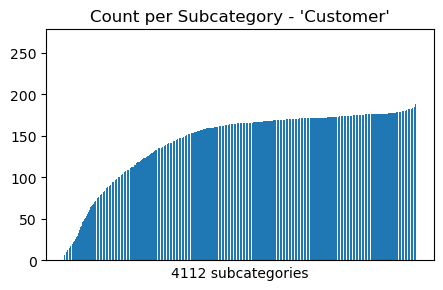

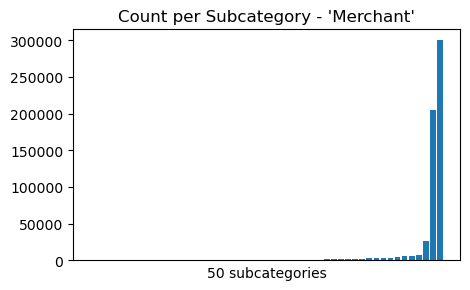

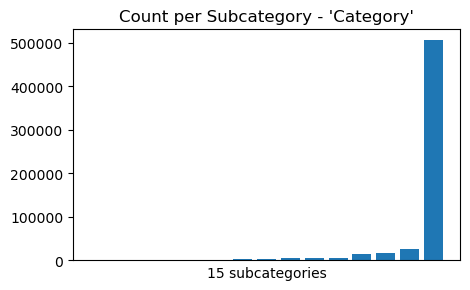

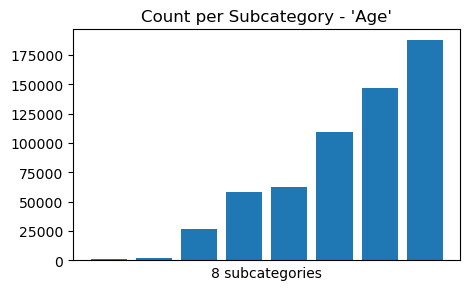

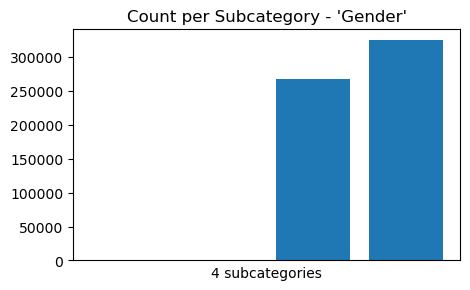

In [14]:
bar_plot(group_cust_count, x_label=f'{len(group_cust_count)} subcategories',
           main_title=f"Count per Subcategory - 'Customer'", ylim=None,
           yticks=True, fig_size=(5, 3), num_percentiles=0, save_plot=False)
bar_plot(group_merch_count, x_label=f'{len(group_merch_count)} subcategories',
           main_title=f"Count per Subcategory - 'Merchant'", ylim=None,
           yticks=True, fig_size=(5, 3), num_percentiles=0, save_plot=False)
bar_plot(group_cat_count, x_label=f'{len(group_cat_count)} subcategories',
           main_title=f"Count per Subcategory - 'Category'", ylim=None,
           yticks=True, fig_size=(5, 3), num_percentiles=0, save_plot=False)
bar_plot(group_age_count, x_label=f'{len(group_age_count)} subcategories',
           main_title=f"Count per Subcategory - 'Age'", ylim=None,
           yticks=True, fig_size=(5, 3), num_percentiles=0, save_plot=False)
bar_plot(group_gender_count, x_label=f'{len(group_gender_count)} subcategories',
           main_title=f"Count per Subcategory - 'Gender'", ylim=None,
           yticks=True, fig_size=(5, 3), num_percentiles=0, save_plot=False)

### Data out of balance

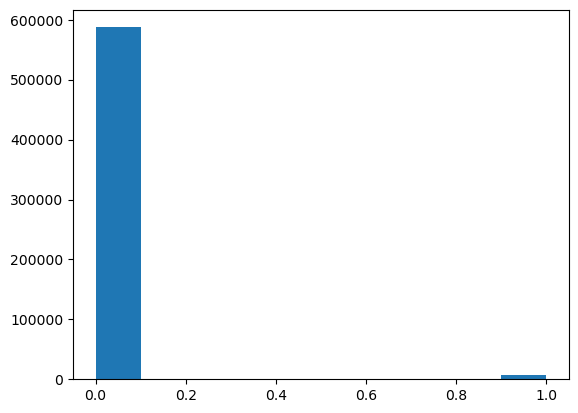

In [15]:
plt.hist(data_bank['fraud'], bins=10)
plt.show()

In [16]:
data_bank['fraud'].value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

## I will add all new features to data_new and then drop them as I need when testing models

## Feature 1, 2, 3 were not as useful. Replaced with feature 9, 10, 11

### Feature 4: fraud to non-fraud ratio per customer

In [17]:
# total transactions per customer
trans_count = data_new.groupby('customer')['fraud'].count()

# fraudulant transactions per customer
fraud_count = data_new.groupby('customer')['fraud'].sum()

# ratio of fraudulant to total transactions per customer
fraud_ratio = fraud_count / trans_count

# add feature to dataframe
data_new['ratio_fraud'] = [fraud_ratio[cust] for cust in data_new['customer']]

### Feature 5: number of transactions per customer

In [18]:
# add feature to dataframe
data_new['total_trans'] = [trans_count[cust] for cust in data_new['customer']]

### Feature 6: total amount spent per customer

In [19]:
group_cust = data_bank.groupby(['customer'])['amount'].sum()
group_cust
data_new['cust_spend'] = [group_cust[cust] for cust in data_new['customer']]

### Feature 7: total amount spent per customer per merchant

In [20]:
group_merch_cust = data_bank.groupby(['customer', 'merchant'])['amount'].sum()
group_merch_cust
data_new['merch_spend'] = [group_merch_cust[cust][merch] for cust, merch in zip(data_new['customer'], data_new['merchant'])]

### Feature 8: total amount spent per customer per category

In [21]:
group_cat_cust = data_bank.groupby(['customer', 'category'])['amount'].sum()
data_new['cat_spend'] = [group_cat_cust[cust][cat] for cust, cat in zip(data_new['customer'], data_new['category'])]

In [22]:
data_new.head(6)

,step,customer,age,gender,merchant,category,amount,fraud,ratio_fraud,total_trans,cust_spend,merch_spend,cat_spend
0,0,C1093826151,4,M,M348934600,transportation,4.55,0,0.0,167,4716.20,4308.77,4308.77
1,0,C352968107,2,M,M348934600,transportation,39.68,0,0.0,169,5519.77,2043.61,4412.56
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0,0.0,65,2693.84,753.93,1485.21
3,0,C1760612790,3,M,M348934600,transportation,17.25,0,0.0,171,5187.93,1372.26,4195.08
4,0,C757503768,5,M,M348934600,transportation,35.72,0,0.0,145,4596.03,1948.67,3545.14
5,0,C1315400589,3,F,M348934600,transportation,25.81,0,0.0,175,5739.56,212.74,3893.96


### Feature 9, 10, 11: grouping categorical variables based on their regression coefs
The ridge coefs were obtained further down in the notebook, saved and loaded back here to save time as running a ridge model with over 4000 variables is quite slow.

Age and gender had much smaller coefs compared to other categories so I decided to drop them

In [23]:
coefs_ridge_s = pd.read_csv('data/LASSO coefs l1reg=0.00001 w-o intercept.csv')

In [24]:
coefs_ridge_s['cat'] = coefs_ridge_s['cat'].str.replace('customer_', '')
coefs_ridge_s['cat'] = coefs_ridge_s['cat'].str.replace('merchant_', '')
coefs_ridge_s['cat'] = coefs_ridge_s['cat'].str.replace('category_', '')
coefs_ridge_s['cat'] = coefs_ridge_s['cat'].str.replace('age_', '')
coefs_ridge_s['cat'] = coefs_ridge_s['cat'].str.replace('gender_', '')

In [25]:
group_cust_lass = coefs_ridge_s[coefs_ridge_s['group_label'] == 1].sort_values(by=['coef'], ascending=False).set_index('cat')['coef']
group_merch_lass = coefs_ridge_s[coefs_ridge_s['group_label'] == 2].sort_values(by=['coef'], ascending=False).set_index('cat')['coef']
group_cat_lass = coefs_ridge_s[coefs_ridge_s['group_label'] == 3].sort_values(by=['coef'], ascending=False).set_index('cat')['coef']
group_age_lass = coefs_ridge_s[coefs_ridge_s['group_label'] == 4].sort_values(by=['coef'], ascending=False).set_index('cat')['coef']
group_gender_lass = coefs_ridge_s[coefs_ridge_s['group_label'] == 5].sort_values(by=['coef'], ascending=False).set_index('cat')['coef']


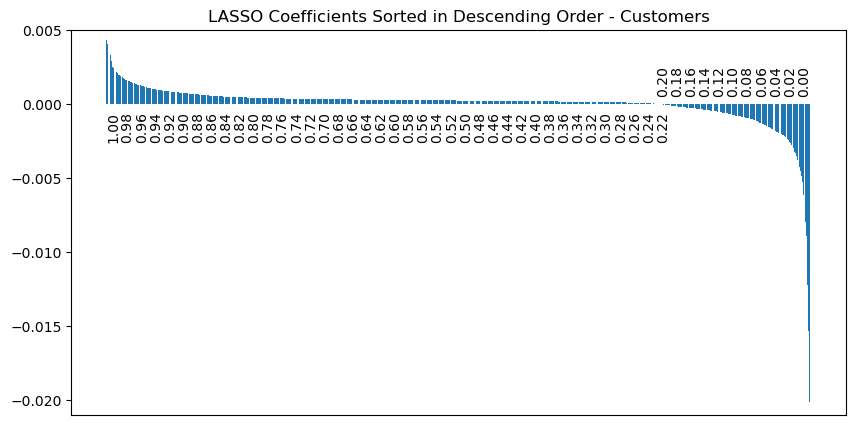

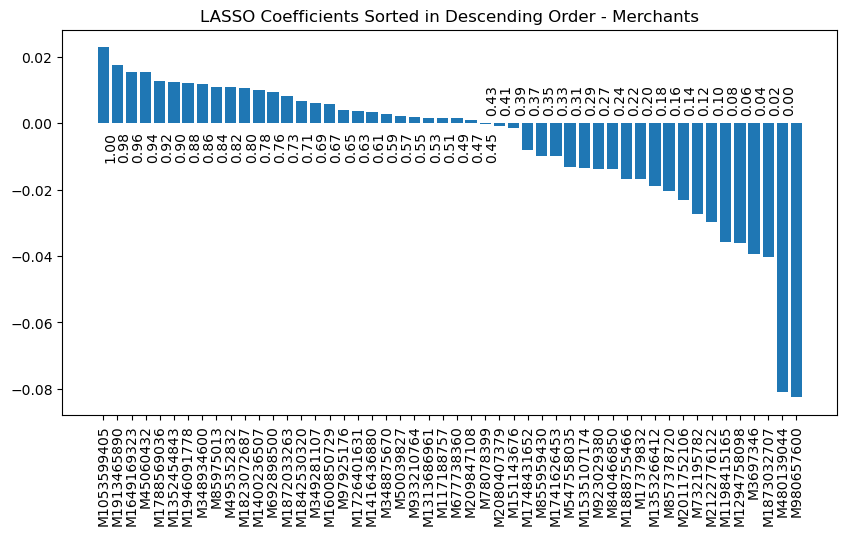

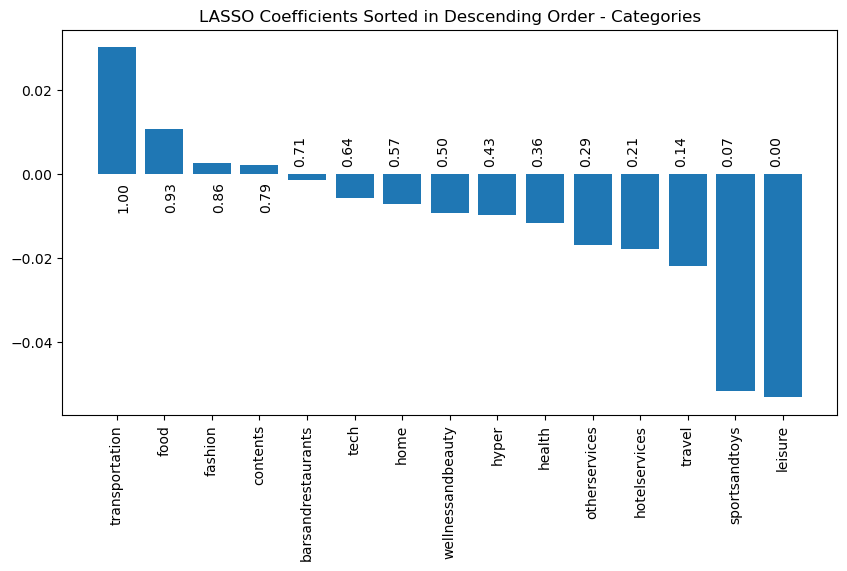

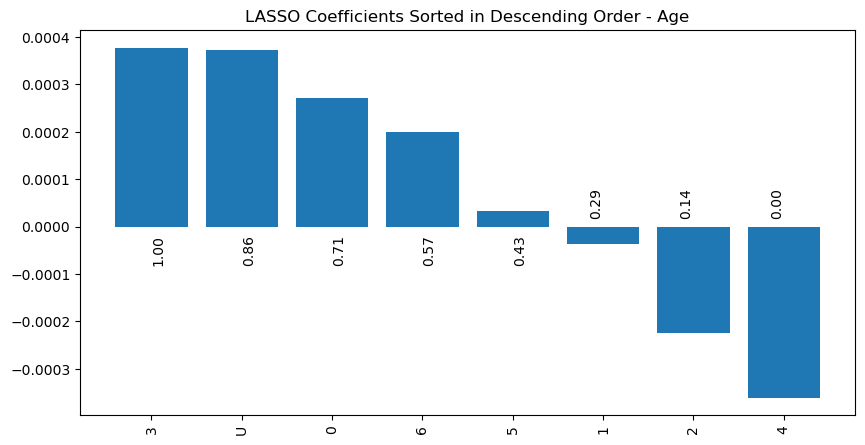

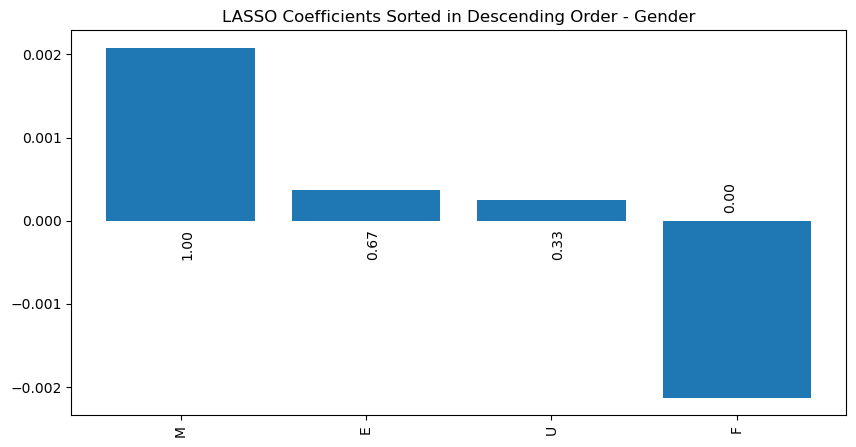

In [26]:
bar_plot(group_cust_lass,
           main_title='LASSO Coefficients Sorted in Descending Order - Customers', ylim=(-0.021,0.005),
           fig_size=(10, 5), num_percentiles=50, save_plot=False)
bar_plot(group_merch_lass,
           main_title='LASSO Coefficients Sorted in Descending Order - Merchants', ylim=None,
           fig_size=(10, 5), num_percentiles=49, xticks=True, save_plot=False)
bar_plot(group_cat_lass,
           main_title='LASSO Coefficients Sorted in Descending Order - Categories', ylim=None,
           fig_size=(10, 5), num_percentiles=14, xticks=True, save_plot=False)
bar_plot(group_age_lass,
           main_title='LASSO Coefficients Sorted in Descending Order - Age', ylim=None,
           fig_size=(10, 5), num_percentiles=7, xticks=True, save_plot=False)
bar_plot(group_gender_lass,
           main_title='LASSO Coefficients Sorted in Descending Order - Gender', ylim=None,
           fig_size=(10, 5), num_percentiles=3, xticks=True, save_plot=False)

In [27]:
# break points were determined by visually inspecting the above bar plots
merch_percent = group_merch_lass.quantile([0.03, 0.07, 0.375, 0.17, 0.3, 0.6, 0.9])
cat_percent = group_cat_lass.quantile([0.1, 0.4, 0.6, 0.9, 0.96])
cust_percent = group_cust_lass.quantile([0.01, 0.02, 0.0275, 0.97, 0.99])

#### The "target" suffix indicates that I selected the break points in a targeted way

In [28]:
# add features to dataframe
data_new['quant_merch_coef'] = data_new.apply(lambda x: assign_quantile_group2(x, group_merch_lass, merch_percent, 'merchant'), axis=1)
data_new['quant_cat_coef'] = data_new.apply(lambda x: assign_quantile_group2(x, group_cat_lass, cat_percent, 'category'), axis=1)
data_new['quant_cust_coef'] = data_new.apply(lambda x: assign_quantile_group2(x, group_cust_lass, cust_percent, 'customer'), axis=1)

In [29]:
data_new.head()

,step,customer,age,gender,merchant,category,amount,fraud,ratio_fraud,total_trans,cust_spend,merch_spend,cat_spend,quant_merch_coef,quant_cat_coef,quant_cust_coef
0,0,C1093826151,4,M,M348934600,transportation,4.55,0,0.0,167,4716.20,4308.77,4308.77,7,6,4
1,0,C352968107,2,M,M348934600,transportation,39.68,0,0.0,169,5519.77,2043.61,4412.56,7,6,4
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0,0.0,65,2693.84,753.93,1485.21,7,6,4
3,0,C1760612790,3,M,M348934600,transportation,17.25,0,0.0,171,5187.93,1372.26,4195.08,7,6,4
4,0,C757503768,5,M,M348934600,transportation,35.72,0,0.0,145,4596.03,1948.67,3545.14,7,6,4


In [30]:
pd.concat((data_new.dtypes.rename('Data_Types'), data_new.nunique().rename('Unique_Entries')), axis=1)

,Data_Types,Unique_Entries
step,int64,180
customer,object,4112
age,object,8
gender,object,4
merchant,object,50
category,object,15
amount,float64,23767
fraud,int64,2
ratio_fraud,float64,633
total_trans,int64,192


In [30]:
data_new_reduced = data_new.copy()
data_temp = data_new_reduced[['customer', 'merchant', 'category', 'age', 'gender', 'step', 'amount',
                              'ratio_fraud', 'merch_spend', 'cat_spend', 'total_trans', 'fraud']].sample(frac=1, random_state=0)

# [['merchant', 'category', 'age', 'gender', 'step', 'amount', 'fraud']]

data3, X, y = one_hot_encode_pandas(data_temp, response='fraud', except_col=['fraud'], drop_first=False)

In [31]:
patch_sklearn()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [32]:
patch_sklearn()
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [33]:

from sklearn.decomposition import PCA
patch_sklearn()

P = PCA(n_components=0.8, svd_solver = 'full')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [34]:
patch_sklearn()
X_reduced = P.fit_transform(X_tr_scaled)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [35]:
X_test_scaled = scaler.transform(X_test)
X_test_reduced = P.transform(X_test_scaled)

In [ ]:
#X_test_test = X_test_scaled @ P.components_.T

In [36]:
xgb_model, ypred_xgb = xgb_logistic_model(X_reduced, y_train, X_test_reduced, y_test, eval_metric='aucpr', max_depth=3, threads=4, iter=50, verbose=True)

[0]	train-aucpr:0.67424	eval-aucpr:0.67596
[1]	train-aucpr:0.78470	eval-aucpr:0.76915
[2]	train-aucpr:0.81403	eval-aucpr:0.80078
[3]	train-aucpr:0.83020	eval-aucpr:0.81795
[4]	train-aucpr:0.84071	eval-aucpr:0.82450
[5]	train-aucpr:0.85022	eval-aucpr:0.83158
[6]	train-aucpr:0.85236	eval-aucpr:0.83222
[7]	train-aucpr:0.85907	eval-aucpr:0.83839
[8]	train-aucpr:0.86806	eval-aucpr:0.84674
[9]	train-aucpr:0.87419	eval-aucpr:0.84825
[10]	train-aucpr:0.88466	eval-aucpr:0.85770
[11]	train-aucpr:0.89035	eval-aucpr:0.85804
[12]	train-aucpr:0.89579	eval-aucpr:0.86106
[13]	train-aucpr:0.90068	eval-aucpr:0.86464
[14]	train-aucpr:0.90594	eval-aucpr:0.86898
[15]	train-aucpr:0.90818	eval-aucpr:0.86960
[16]	train-aucpr:0.91269	eval-aucpr:0.87164
[17]	train-aucpr:0.91629	eval-aucpr:0.87324
[18]	train-aucpr:0.91719	eval-aucpr:0.87246
[19]	train-aucpr:0.91977	eval-aucpr:0.87362
[20]	train-aucpr:0.92336	eval-aucpr:0.87616
[21]	train-aucpr:0.92582	eval-aucpr:0.87571
[22]	train-aucpr:0.92937	eval-aucpr:0.8776

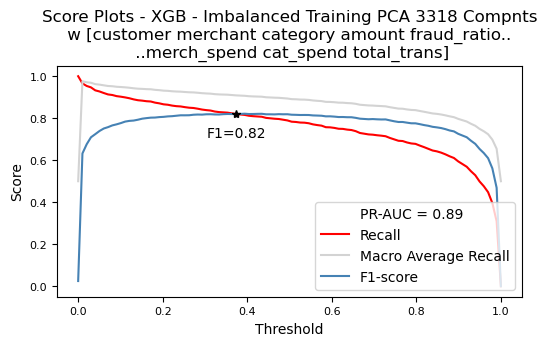

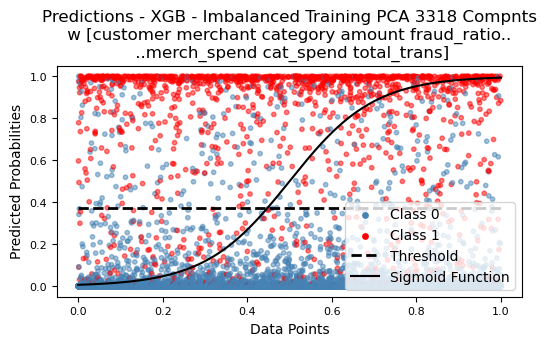

######### XGB - Imbalanced Training PCA 3318 Compnts- w [customer merchant category amount fraud_ratio.. - ..merch_spend cat_spend total_trans] #########
Confusion Matrix - Optimal Threshold = 0.374

     0    1
117173  269
   268 1219

Classification Report - Optimal Threshold = 0.374

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117442
           1       0.82      0.82      0.82      1487

    accuracy                           1.00    118929
   macro avg       0.91      0.91      0.91    118929
weighted avg       1.00      1.00      1.00    118929



In [37]:
title = f'- XGB - Imbalanced Training PCA {P.components_.shape[0]} Compnts\n w [customer merchant category amount fraud_ratio.. \n ..merch_spend cat_spend total_trans]'
full_class_report(y_test, ypred_xgb, title=title,
                  l_lim=0, u_lim=1, num_thresh=100,
                  sample0=1,
                  criterion='f1_recall_diff',
                  legend_loc='lower right', save_plot=False)

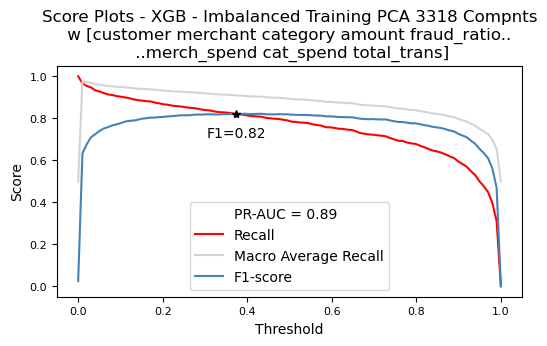

In [38]:
_, pr_auc_xgb_reduced_frac, recall_xgb_reduced_frac, f1_xgb_reduced_frac, recall_macro_xgb_reduced_frac = (
    classification_plots(y_test, ypred_xgb, l_lim=0, u_lim=1, num_thresh=100,
                         criterion='f1_recall_diff', title=title, legend_loc='best',
                         save_plot=False))

In [39]:
print(f'pr_auc_xgb_reduced_frac: {pr_auc_xgb_reduced_frac},\nrecall_xgb_reduced_frac: {recall_xgb_reduced_frac},\nf1_xgb_reduced_frac: {f1_xgb_reduced_frac},\nrecall_macro_xgb_reduced_frac: {recall_macro_xgb_reduced_frac},')

pr_auc_xgb_reduced_frac: 0.8883218900114074,
recall_xgb_reduced_frac: 0.8197713517148622,
f1_xgb_reduced_frac: 0.8194957983193277,
recall_macro_xgb_reduced_frac: 0.9087404296933671,


In [40]:

from sklearn.decomposition import PCA
patch_sklearn()

P = PCA(n_components=0.6, svd_solver = 'full')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [41]:
patch_sklearn()
X_reduced = P.fit_transform(X_tr_scaled)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [42]:
X_test_scaled = scaler.transform(X_test)
X_test_reduced = P.transform(X_test_scaled)

In [43]:
#X_test_test = X_test_scaled @ P.components_.T

In [44]:
xgb_model, ypred_xgb = xgb_logistic_model(X_reduced, y_train, X_test_reduced, y_test, eval_metric='aucpr', max_depth=3, threads=4, iter=50, verbose=True)

[0]	train-aucpr:0.67424	eval-aucpr:0.67596
[1]	train-aucpr:0.78470	eval-aucpr:0.76915
[2]	train-aucpr:0.81403	eval-aucpr:0.80078
[3]	train-aucpr:0.83020	eval-aucpr:0.81795
[4]	train-aucpr:0.84071	eval-aucpr:0.82450
[5]	train-aucpr:0.85022	eval-aucpr:0.83158
[6]	train-aucpr:0.85236	eval-aucpr:0.83222
[7]	train-aucpr:0.85907	eval-aucpr:0.83839
[8]	train-aucpr:0.86806	eval-aucpr:0.84674
[9]	train-aucpr:0.87419	eval-aucpr:0.84825
[10]	train-aucpr:0.88466	eval-aucpr:0.85770
[11]	train-aucpr:0.89035	eval-aucpr:0.85804
[12]	train-aucpr:0.89610	eval-aucpr:0.86373
[13]	train-aucpr:0.90024	eval-aucpr:0.86295
[14]	train-aucpr:0.90343	eval-aucpr:0.86617
[15]	train-aucpr:0.90902	eval-aucpr:0.87289
[16]	train-aucpr:0.91321	eval-aucpr:0.87556
[17]	train-aucpr:0.91712	eval-aucpr:0.87736
[18]	train-aucpr:0.92067	eval-aucpr:0.87861
[19]	train-aucpr:0.92074	eval-aucpr:0.88047
[20]	train-aucpr:0.92372	eval-aucpr:0.88007
[21]	train-aucpr:0.92624	eval-aucpr:0.88171
[22]	train-aucpr:0.92807	eval-aucpr:0.8793

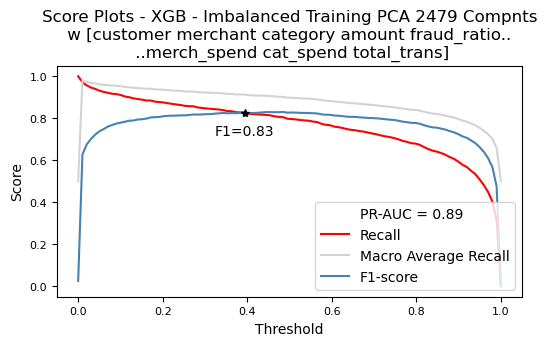

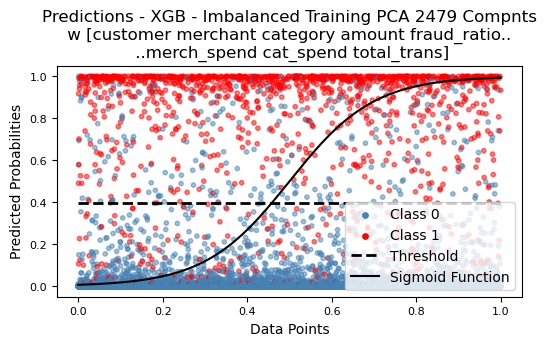

######### XGB - Imbalanced Training PCA 2479 Compnts- w [customer merchant category amount fraud_ratio.. - ..merch_spend cat_spend total_trans] #########
Confusion Matrix - Optimal Threshold = 0.394

     0    1
117182  260
   257 1230

Classification Report - Optimal Threshold = 0.394

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117442
           1       0.83      0.83      0.83      1487

    accuracy                           1.00    118929
   macro avg       0.91      0.91      0.91    118929
weighted avg       1.00      1.00      1.00    118929



In [45]:
title = f'- XGB - Imbalanced Training PCA {P.components_.shape[0]} Compnts\n w [customer merchant category amount fraud_ratio.. \n ..merch_spend cat_spend total_trans]'
full_class_report(y_test, ypred_xgb, title=title,
                  l_lim=0, u_lim=1, num_thresh=100,
                  sample0=1,
                  criterion='f1_recall_diff',
                  legend_loc='lower right', save_plot=False)

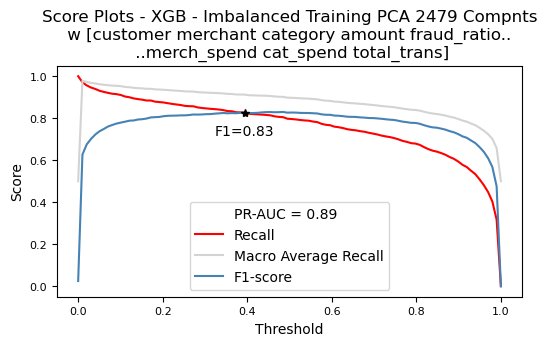

In [46]:
_, pr_auc_xgb_reduced_frac, recall_xgb_reduced_frac, f1_xgb_reduced_frac, recall_macro_xgb_reduced_frac = (
    classification_plots(y_test, ypred_xgb, l_lim=0, u_lim=1, num_thresh=100,
                         criterion='f1_recall_diff', title=title, legend_loc='best',
                         save_plot=False))

In [47]:
print(f'pr_auc_xgb_reduced_frac: {pr_auc_xgb_reduced_frac},\nrecall_xgb_reduced_frac: {recall_xgb_reduced_frac},\nf1_xgb_reduced_frac: {f1_xgb_reduced_frac},\nrecall_macro_xgb_reduced_frac: {recall_macro_xgb_reduced_frac},')

pr_auc_xgb_reduced_frac: 0.8879836836331798,
recall_xgb_reduced_frac: 0.8271687962340283,
f1_xgb_reduced_frac: 0.8263352368155862,
recall_macro_xgb_reduced_frac: 0.9124774687391084,


In [48]:

from sklearn.decomposition import PCA
patch_sklearn()

P = PCA(n_components=0.4, svd_solver = 'full')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [49]:
patch_sklearn()
X_reduced = P.fit_transform(X_tr_scaled)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [50]:
X_test_scaled = scaler.transform(X_test)
X_test_reduced = P.transform(X_test_scaled)

In [51]:
#X_test_test = X_test_scaled @ P.components_.T

In [52]:
xgb_model, ypred_xgb = xgb_logistic_model(X_reduced, y_train, X_test_reduced, y_test, eval_metric='aucpr', max_depth=3, threads=4, iter=50, verbose=True)

[0]	train-aucpr:0.67424	eval-aucpr:0.67596
[1]	train-aucpr:0.78470	eval-aucpr:0.76915
[2]	train-aucpr:0.81403	eval-aucpr:0.80078
[3]	train-aucpr:0.83020	eval-aucpr:0.81795
[4]	train-aucpr:0.84071	eval-aucpr:0.82450
[5]	train-aucpr:0.84889	eval-aucpr:0.83274
[6]	train-aucpr:0.85134	eval-aucpr:0.83346
[7]	train-aucpr:0.85731	eval-aucpr:0.83523
[8]	train-aucpr:0.86774	eval-aucpr:0.84569
[9]	train-aucpr:0.87456	eval-aucpr:0.84786
[10]	train-aucpr:0.88069	eval-aucpr:0.85350
[11]	train-aucpr:0.88514	eval-aucpr:0.85577
[12]	train-aucpr:0.89096	eval-aucpr:0.86141
[13]	train-aucpr:0.89538	eval-aucpr:0.86398
[14]	train-aucpr:0.89939	eval-aucpr:0.86629
[15]	train-aucpr:0.90372	eval-aucpr:0.87193
[16]	train-aucpr:0.90752	eval-aucpr:0.87279
[17]	train-aucpr:0.90896	eval-aucpr:0.87252
[18]	train-aucpr:0.91180	eval-aucpr:0.87136
[19]	train-aucpr:0.91525	eval-aucpr:0.87188
[20]	train-aucpr:0.91809	eval-aucpr:0.87289
[21]	train-aucpr:0.91999	eval-aucpr:0.87379
[22]	train-aucpr:0.92269	eval-aucpr:0.8753

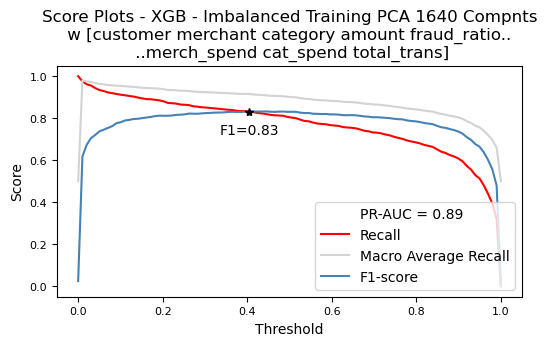

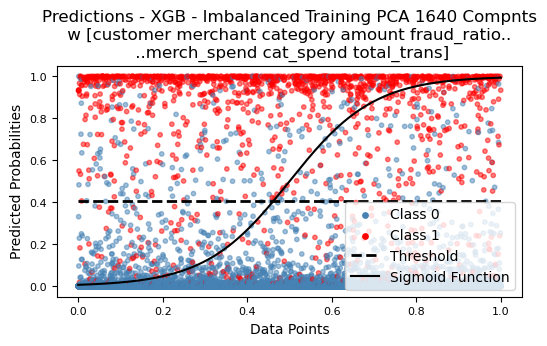

######### XGB - Imbalanced Training PCA 1640 Compnts- w [customer merchant category amount fraud_ratio.. - ..merch_spend cat_spend total_trans] #########
Confusion Matrix - Optimal Threshold = 0.404

     0    1
117189  253
   249 1238

Classification Report - Optimal Threshold = 0.404

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117442
           1       0.83      0.83      0.83      1487

    accuracy                           1.00    118929
   macro avg       0.91      0.92      0.91    118929
weighted avg       1.00      1.00      1.00    118929



In [53]:
title = f'- XGB - Imbalanced Training PCA {P.components_.shape[0]} Compnts\n w [customer merchant category amount fraud_ratio.. \n ..merch_spend cat_spend total_trans]'
full_class_report(y_test, ypred_xgb, title=title,
                  l_lim=0, u_lim=1, num_thresh=100,
                  sample0=1,
                  criterion='f1_recall_diff',
                  legend_loc='lower right', save_plot=False)

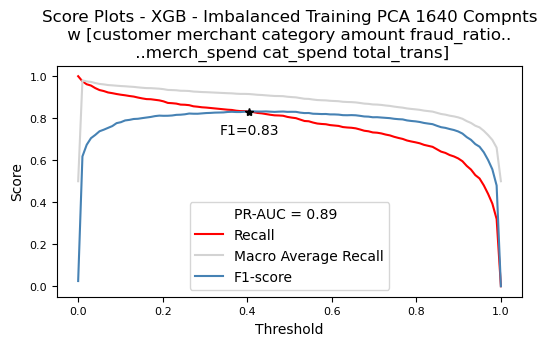

In [54]:
_, pr_auc_xgb_reduced_frac, recall_xgb_reduced_frac, f1_xgb_reduced_frac, recall_macro_xgb_reduced_frac = (
    classification_plots(y_test, ypred_xgb, l_lim=0, u_lim=1, num_thresh=100,
                         criterion='f1_recall_diff', title=title, legend_loc='best',
                         save_plot=False))

In [55]:
print(f'pr_auc_xgb_reduced_frac: {pr_auc_xgb_reduced_frac},\nrecall_xgb_reduced_frac: {recall_xgb_reduced_frac},\nf1_xgb_reduced_frac: {f1_xgb_reduced_frac},\nrecall_macro_xgb_reduced_frac: {recall_macro_xgb_reduced_frac},')

pr_auc_xgb_reduced_frac: 0.8896271448854454,
recall_xgb_reduced_frac: 0.8325487558843309,
f1_xgb_reduced_frac: 0.8314304902619206,
recall_macro_xgb_reduced_frac: 0.9151972505090495,


In [56]:

from sklearn.decomposition import PCA
patch_sklearn()

P = PCA(n_components=30)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [57]:
patch_sklearn()
X_reduced = P.fit_transform(X_tr_scaled)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [58]:
X_test_scaled = scaler.transform(X_test)
X_test_reduced = P.transform(X_test_scaled)

In [59]:
#X_test_test = X_test_scaled @ P.components_.T

In [60]:
xgb_model, ypred_xgb = xgb_logistic_model(X_reduced, y_train, X_test_reduced, y_test, eval_metric='aucpr', max_depth=3, threads=4, iter=50, verbose=True)

[0]	train-aucpr:0.69801	eval-aucpr:0.70100
[1]	train-aucpr:0.77955	eval-aucpr:0.77612
[2]	train-aucpr:0.79590	eval-aucpr:0.78846
[3]	train-aucpr:0.81467	eval-aucpr:0.80945
[4]	train-aucpr:0.82811	eval-aucpr:0.82211
[5]	train-aucpr:0.83487	eval-aucpr:0.82607
[6]	train-aucpr:0.84526	eval-aucpr:0.83489
[7]	train-aucpr:0.85042	eval-aucpr:0.83953
[8]	train-aucpr:0.85874	eval-aucpr:0.84484
[9]	train-aucpr:0.86105	eval-aucpr:0.84912
[10]	train-aucpr:0.86537	eval-aucpr:0.85332
[11]	train-aucpr:0.87598	eval-aucpr:0.85691
[12]	train-aucpr:0.88271	eval-aucpr:0.86447
[13]	train-aucpr:0.88373	eval-aucpr:0.86408
[14]	train-aucpr:0.88744	eval-aucpr:0.86711
[15]	train-aucpr:0.89196	eval-aucpr:0.87055
[16]	train-aucpr:0.89509	eval-aucpr:0.87289
[17]	train-aucpr:0.89769	eval-aucpr:0.87479
[18]	train-aucpr:0.90116	eval-aucpr:0.87779
[19]	train-aucpr:0.90421	eval-aucpr:0.87976
[20]	train-aucpr:0.90655	eval-aucpr:0.87918
[21]	train-aucpr:0.90901	eval-aucpr:0.87790
[22]	train-aucpr:0.91105	eval-aucpr:0.8787

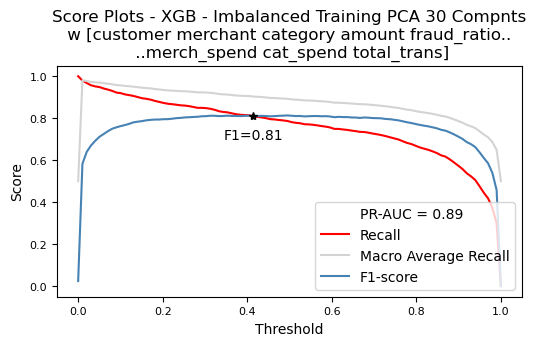

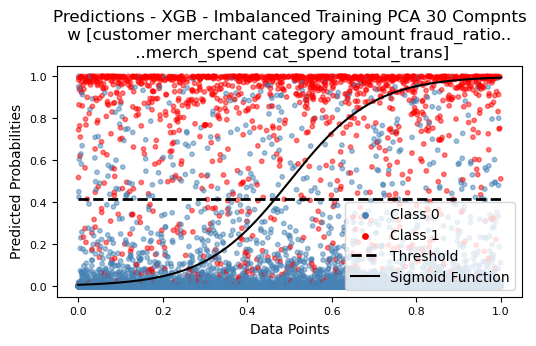

######### XGB - Imbalanced Training PCA 30 Compnts- w [customer merchant category amount fraud_ratio.. - ..merch_spend cat_spend total_trans] #########
Confusion Matrix - Optimal Threshold = 0.414

     0    1
117162  280
   284 1203

Classification Report - Optimal Threshold = 0.414

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117442
           1       0.81      0.81      0.81      1487

    accuracy                           1.00    118929
   macro avg       0.90      0.90      0.90    118929
weighted avg       1.00      1.00      1.00    118929



In [61]:
title = f'- XGB - Imbalanced Training PCA {P.components_.shape[0]} Compnts\n w [customer merchant category amount fraud_ratio.. \n ..merch_spend cat_spend total_trans]'
full_class_report(y_test, ypred_xgb, title=title,
                  l_lim=0, u_lim=1, num_thresh=100,
                  sample0=1,
                  criterion='f1_recall_diff',
                  legend_loc='lower right', save_plot=False)

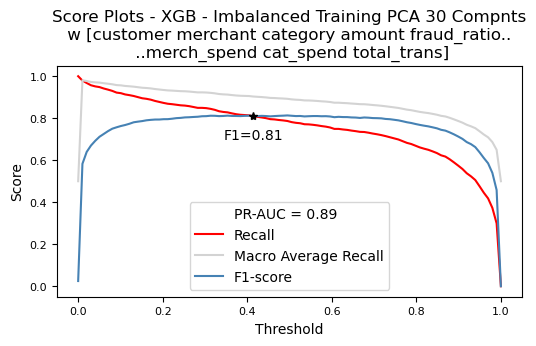

In [62]:
_, pr_auc_xgb_reduced_frac, recall_xgb_reduced_frac, f1_xgb_reduced_frac, recall_macro_xgb_reduced_frac = (
    classification_plots(y_test, ypred_xgb, l_lim=0, u_lim=1, num_thresh=100,
                         criterion='f1_recall_diff', title=title, legend_loc='best',
                         save_plot=False))

In [63]:
print(f'pr_auc_xgb_reduced_frac: {pr_auc_xgb_reduced_frac},\nrecall_xgb_reduced_frac: {recall_xgb_reduced_frac},\nf1_xgb_reduced_frac: {f1_xgb_reduced_frac},\nrecall_macro_xgb_reduced_frac: {recall_macro_xgb_reduced_frac},')

pr_auc_xgb_reduced_frac: 0.892570583896961,
recall_xgb_reduced_frac: 0.8090114324142569,
f1_xgb_reduced_frac: 0.8101010101010101,
recall_macro_xgb_reduced_frac: 0.9033136384155377,


In [64]:
data_new_reduced = data_new.copy()
data_temp = data_new_reduced[['quant_cust_coef', 'quant_merch_coef', 'quant_cat_coef', 'amount',
                              'ratio_fraud', 'merch_spend', 'cat_spend', 'total_trans', 'fraud']].sample(frac=1, random_state=0)

# [['merchant', 'category', 'age', 'gender', 'step', 'amount', 'fraud']]

data3, X, y = one_hot_encode_pandas(data_temp, response='fraud', except_col=['fraud'], drop_first=False)

In [68]:
patch_sklearn()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [69]:
patch_sklearn()
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [70]:

from sklearn.decomposition import PCA
patch_sklearn()

P = PCA(n_components=0.95, svd_solver='full')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [71]:
patch_sklearn()
X_reduced = P.fit_transform(X_tr_scaled)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [72]:
X_test_scaled = scaler.transform(X_test)
X_test_reduced = P.transform(X_test_scaled)

In [73]:
#X_test_test = X_test_scaled @ P.components_.T

In [75]:
xgb_model, ypred_xgb = xgb_logistic_model(X_reduced, y_train, X_test_reduced, y_test, eval_metric='aucpr', max_depth=3, threads=4, iter=100, verbose=True)

[0]	train-aucpr:0.74403	eval-aucpr:0.73309
[1]	train-aucpr:0.84412	eval-aucpr:0.83043
[2]	train-aucpr:0.87014	eval-aucpr:0.85845
[3]	train-aucpr:0.88985	eval-aucpr:0.87538
[4]	train-aucpr:0.89716	eval-aucpr:0.88214
[5]	train-aucpr:0.90401	eval-aucpr:0.88899
[6]	train-aucpr:0.90749	eval-aucpr:0.89518
[7]	train-aucpr:0.91115	eval-aucpr:0.89656
[8]	train-aucpr:0.91743	eval-aucpr:0.90245
[9]	train-aucpr:0.91968	eval-aucpr:0.90393
[10]	train-aucpr:0.91298	eval-aucpr:0.90277
[11]	train-aucpr:0.92329	eval-aucpr:0.90619
[12]	train-aucpr:0.92683	eval-aucpr:0.90917
[13]	train-aucpr:0.92836	eval-aucpr:0.91019
[14]	train-aucpr:0.93130	eval-aucpr:0.91434
[15]	train-aucpr:0.93388	eval-aucpr:0.91651
[16]	train-aucpr:0.93552	eval-aucpr:0.91619
[17]	train-aucpr:0.93698	eval-aucpr:0.91713
[18]	train-aucpr:0.93883	eval-aucpr:0.91831
[19]	train-aucpr:0.94015	eval-aucpr:0.91832
[20]	train-aucpr:0.94124	eval-aucpr:0.91903
[21]	train-aucpr:0.94231	eval-aucpr:0.91830
[22]	train-aucpr:0.94352	eval-aucpr:0.9196

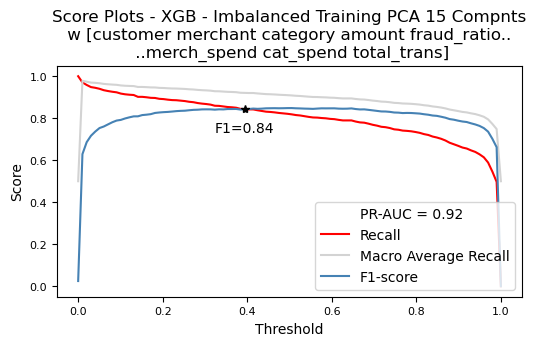

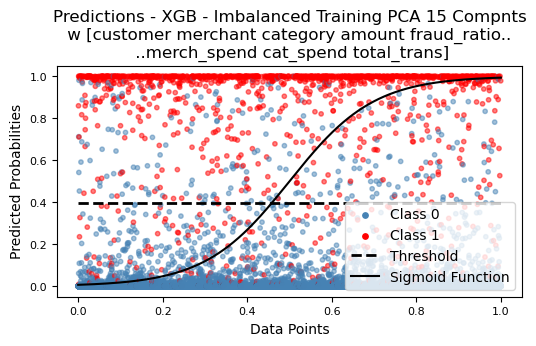

######### XGB - Imbalanced Training PCA 15 Compnts- w [customer merchant category amount fraud_ratio.. - ..merch_spend cat_spend total_trans] #########
Confusion Matrix - Optimal Threshold = 0.394

     0    1
117206  236
   233 1254

Classification Report - Optimal Threshold = 0.394

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117442
           1       0.84      0.84      0.84      1487

    accuracy                           1.00    118929
   macro avg       0.92      0.92      0.92    118929
weighted avg       1.00      1.00      1.00    118929



In [76]:
title = f'- XGB - Imbalanced Training PCA {P.components_.shape[0]} Compnts\n w [customer merchant category amount fraud_ratio.. \n ..merch_spend cat_spend total_trans]'
full_class_report(y_test, ypred_xgb, title=title,
                  l_lim=0, u_lim=1, num_thresh=100,
                  sample0=1,
                  criterion='f1_recall_diff',
                  legend_loc='lower right', save_plot=False)

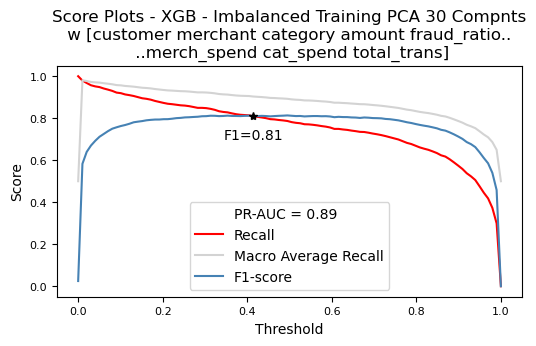

In [62]:
_, pr_auc_xgb_reduced_frac, recall_xgb_reduced_frac, f1_xgb_reduced_frac, recall_macro_xgb_reduced_frac = (
    classification_plots(y_test, ypred_xgb, l_lim=0, u_lim=1, num_thresh=100,
                         criterion='f1_recall_diff', title=title, legend_loc='best',
                         save_plot=False))

In [63]:
print(f'pr_auc_xgb_reduced_frac: {pr_auc_xgb_reduced_frac},\nrecall_xgb_reduced_frac: {recall_xgb_reduced_frac},\nf1_xgb_reduced_frac: {f1_xgb_reduced_frac},\nrecall_macro_xgb_reduced_frac: {recall_macro_xgb_reduced_frac},')

pr_auc_xgb_reduced_frac: 0.892570583896961,
recall_xgb_reduced_frac: 0.8090114324142569,
f1_xgb_reduced_frac: 0.8101010101010101,
recall_macro_xgb_reduced_frac: 0.9033136384155377,


# Ridge

Original Labels
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

Group Numbers (Groups used for plotting purposes not for regularization)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 1, 1, 1, 1]

1/60 lambda: 1.00e+12 - f1 = 0.00%
2/60 lambda: 6.51e+11 - f1 = 0.00%
3/60 lambda: 4.24e+11 - f1 = 0.00%
4/60 lambda: 2.76e+11 - f1 = 0.00%
5/60 lambda: 1.80e+11 - f1 = 0.00%
6/60 lambda: 1.17e+11 - f1 = 0.00%
7/60 lambda: 7.61e+10 - f1 = 0.18%
8/60 lambda: 4.95e+10 - f1 = 0.36%
9/60 lambda: 3.22e+10 - f1 = 3.04%
10/60 lambda: 2.10e+10 - f1 = 17.56%
11/60 lambda: 1.37e+10 - f1 = 30.70%
12/60 lambda: 8.90e+09 - f1 = 44.80%
13/60 lambda: 5.79e+09 - f1 = 54.73%
14/60 lambda: 3.77e+09 - f1 = 61.16%
15/60 lambda: 2.45e+09 - f1 = 67.97%
16/60 lambda: 1.60e+09 - f1 = 72.09%
17/60 lambda: 1.04e+09 - f1 = 75.66%
18/60 lambda: 6.77e+08 - f1 = 78.16%
19/60 lambda: 4.41e+08 - f1 = 79.29%
20/60 lambda: 2.87e+08 - f1 = 80.12%
21/60 lambda: 1.87e+08 - f1 = 81.04%
22/60 lambda: 1.22e+08 - f1 = 81.31%
23/

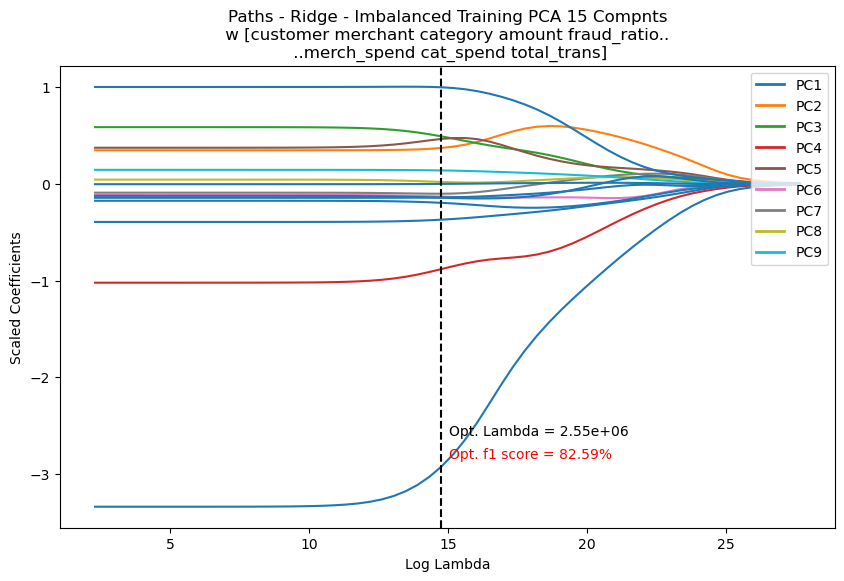

In [95]:
X_r_tr = pd.DataFrame(data=X_reduced, columns=[f'PC{x}' for x in range(1, X_reduced.shape[1]+1)])
X_r_ts = pd.DataFrame(data=X_test_reduced, columns=[f'PC{x}' for x in range(1, X_reduced.shape[1]+1)])
title = f'- Ridge - Imbalanced Training PCA {P.components_.shape[0]} Compnts\n w [customer merchant category amount fraud_ratio.. \n ..merch_spend cat_spend total_trans]'
original_labels = X_r_tr.columns.tolist()
model_r, coefs_r, lam_r, ypred_r, group_lass_labels, labels, scores_r = (
    ridge_paths(X_r_tr, y_train, X_r_ts, original_labels,
                c_start=-12, c_stop=-1, c_num=60,
                scoring='f1',
                n_iter=100,
                tol=1e-3,
                cmap='tab10',
                title=title,
                verbose=True,
                save_plot=False))

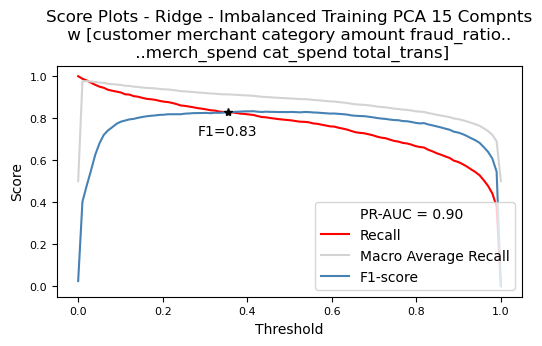

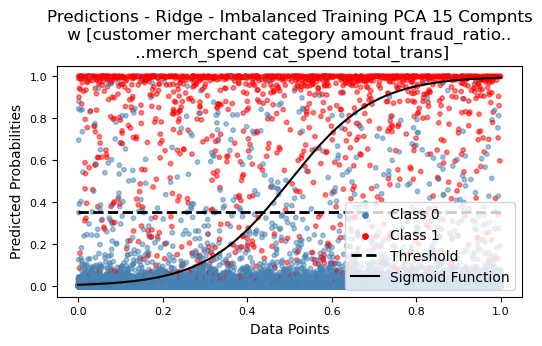

######### Ridge - Imbalanced Training PCA 15 Compnts- w [customer merchant category amount fraud_ratio.. - ..merch_spend cat_spend total_trans] #########
Confusion Matrix - Optimal Threshold = 0.354

     0    1
117185  257
   254 1233

Classification Report - Optimal Threshold = 0.354

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117442
           1       0.83      0.83      0.83      1487

    accuracy                           1.00    118929
   macro avg       0.91      0.91      0.91    118929
weighted avg       1.00      1.00      1.00    118929



In [91]:
full_class_report(y_test, ypred_r, title=title,
                  l_lim=0, u_lim=1, num_thresh=100,
                  criterion='f1_recall_diff',
                  sample0=1,
                  legend_loc='lower right', save_plot=False)

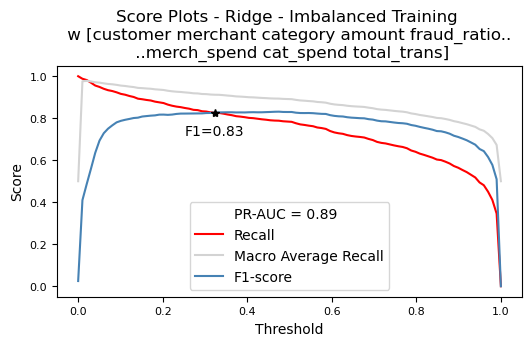

In [112]:
_, pr_auc_r_reduced, recall_r_reduced, f1_r_reduced, recall_macro_r_reduced = (
    classification_plots(y_test, ypred_r, l_lim=0, u_lim=1, num_thresh=100,
                         criterion='f1_recall_diff', title=title, legend_loc='best',
                         save_plot=False))

## PCA

In [33]:
mu_hat = X.mean(axis=0)
x = np.linspace(0, 1, len(mu_hat))
grids = np.meshgrid(x, x)
diffs = X - mu_hat

In [ ]:
Cov = np.cov(diffs.T)

In [ ]:
from matplotlib import colormaps as cm




fig = plt.figure()
ax = fig.add_subplot(projection='3d') 
ax.plot_surface(grids[0], grids[1], Cov, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
plt.title('Unsmoothed Covariances', fontsize=15)
#plt.savefig('Unsmoothed Covariances.svg')
plt.show()

In [16]:
from scipy.ndimage import gaussian_filter
from matplotlib import colormaps as cm

Cov_smooth = gaussian_filter(Cov, sigma=7)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(grids[0], grids[1], Cov_smooth, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
plt.title('Smoothed Covariances', fontsize=15)
#plt.savefig('Smoothed Covariances.svg')
plt.show()

Sharp peaks in covariances brought down from ~1 to ~0.3

### Plotting class 1 vs class0 using only the first 2 PCs. We can already see some separation between classes, and this is expected to improve with adding more PCs.

In [17]:
l, psi = np.linalg.eigh(Cov_smooth) #l = eigenvalues, psi = eigenvectors
PCs = psi[:, -2:]
FPC_scores = diffs.dot(PCs)
plt.plot(FPC_scores[np.where(y == 0)][:, 0],FPC_scores[np.where(y == 0)][:, 1],'bo',label='Class 0')
plt.plot(FPC_scores[np.where(y == 1)][:, 0],FPC_scores[np.where(y == 1)][:, 1],'ro',label='Class 1')
plt.title('PC1 vs PC2', fontsize=15)
plt.xlabel('PC1', fontsize=13)
plt.ylabel('PC2', fontsize=13)
plt.legend()
#plt.savefig('PC1 vs PC2.svg')
plt.show()

### Explained Variance

In [18]:
# manually calculating Cumulative explained variance
k = []
ggg = l / np.sum(l)
temp = 0
for i in range(1,len(ggg)+1):
    temp += ggg[-i]
    k.append(temp)
k
    

In [19]:
import numpy as np
from sklearn.decomposition import PCA

my_model = PCA()
my_model.fit_transform(diffs)
cum_var = my_model.explained_variance_ratio_.cumsum()
print(my_model.explained_variance_ratio_.cumsum())

In [20]:
plt.plot(range(0, diffs.shape[1]), cum_var, 'o', label='Cumulative Expalined Variance', alpha=0.5)
plt.title('% Explained Variance vs PCs', fontsize=15)
plt.xlabel('Number of PCs', fontsize=13)
plt.ylabel('Cumulative Expalained Variance', fontsize=13)

plt.xticks(np.arange(0, 101, 10))

plt.legend()
plt.grid()
#plt.savefig('Explained variance.svg')
plt.show()

### Using Random Forests, adding 1 PC at a time and pick highest accuracy:

In [21]:
accuracy = []
PC_set = range(0, X.shape[1])
for i in PC_set:
    np.random.seed(20)
    PCs = psi[:, -i:]
    FPC_scores = diffs.dot(PCs)
    rf = RandomForestClassifier()
    rf.fit(FPC_scores[i_train, :], y_train)
    pred = rf.predict(FPC_scores[i_test, :])
    conf = confusion_matrix(y_test, pred)
    conf = pd.DataFrame(conf, index=['Class 0', 'Class 1'], columns=[
        'Predicted 0', 'Predicted 1'])
    TP = conf.loc['Class 1', 'Predicted 1']
    FP = conf.loc['Class 0', 'Predicted 1']
    TN = conf.loc['Class 0', 'Predicted 0']
    FN = conf.loc['Class 1', 'Predicted 0']
    a = (TP + TN) / (TP + TN + FP + FN)
    accuracy.append(a)

# Predicting customer groups

In [54]:
data_new_reduced = data_new.copy()
data_temp = data_new_reduced[['quant_cust_coef', 'age', 'gender', 'step', 'amount']].sample(frac=1, random_state=0)
data_temp['quant_cust_coef'] = data_temp['quant_cust_coef'].astype('int')

# [['customer', 'merchant', 'category', 'age', 'gender', 'step', 'amount', 'ratio_fraud', 'merch_spend', 'cat_spend', 'total_trans', 'fraud']]

# [['merchant', 'category', 'age', 'gender', 'step', 'amount', 'fraud']]

data3, X, y = one_hot_encode_pandas(data_temp, response='quant_cust_coef', except_col=['quant_cust_coef'], drop_first=False)

In [55]:
patch_sklearn()
y['quant_cust_coef'] = y['quant_cust_coef']-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [52]:
from xgboost import XGBClassifier

model = XGBClassifier(objective='multi:softprob', verbose=True, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

[11:48:43] WARNING: C:\b\abs_7diruzi3as\croot\xgboost-split_1712794727514\work\src\learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [49]:
y_pred = model.predict(X_test)

In [50]:
# Calculate accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.16%


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.10      0.17       956
           1       0.50      0.01      0.01       711
           2       0.00      0.00      0.00       575
           3       0.97      1.00      0.99    115562
           4       0.00      0.00      0.00       940
           5       0.00      0.00      0.00       185

    accuracy                           0.97    118929
   macro avg       0.32      0.18      0.19    118929
weighted avg       0.95      0.97      0.96    118929



In [36]:
xgb_model, ypred_xgb = xgb_logistic_model(X_reduced, y_train, X_test_reduced, y_test, eval_metric='aucpr', max_depth=3, threads=4, iter=50, verbose=True)

[0]	train-aucpr:0.67424	eval-aucpr:0.67596
[1]	train-aucpr:0.78470	eval-aucpr:0.76915
[2]	train-aucpr:0.81403	eval-aucpr:0.80078
[3]	train-aucpr:0.83020	eval-aucpr:0.81795
[4]	train-aucpr:0.84071	eval-aucpr:0.82450
[5]	train-aucpr:0.85022	eval-aucpr:0.83158
[6]	train-aucpr:0.85236	eval-aucpr:0.83222
[7]	train-aucpr:0.85907	eval-aucpr:0.83839
[8]	train-aucpr:0.86806	eval-aucpr:0.84674
[9]	train-aucpr:0.87419	eval-aucpr:0.84825
[10]	train-aucpr:0.88466	eval-aucpr:0.85770
[11]	train-aucpr:0.89035	eval-aucpr:0.85804
[12]	train-aucpr:0.89579	eval-aucpr:0.86106
[13]	train-aucpr:0.90068	eval-aucpr:0.86464
[14]	train-aucpr:0.90594	eval-aucpr:0.86898
[15]	train-aucpr:0.90818	eval-aucpr:0.86960
[16]	train-aucpr:0.91269	eval-aucpr:0.87164
[17]	train-aucpr:0.91629	eval-aucpr:0.87324
[18]	train-aucpr:0.91719	eval-aucpr:0.87246
[19]	train-aucpr:0.91977	eval-aucpr:0.87362
[20]	train-aucpr:0.92336	eval-aucpr:0.87616
[21]	train-aucpr:0.92582	eval-aucpr:0.87571
[22]	train-aucpr:0.92937	eval-aucpr:0.8776

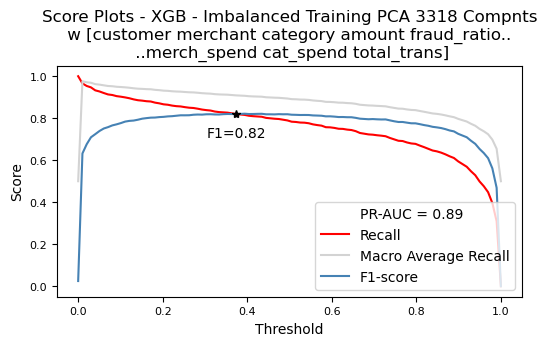

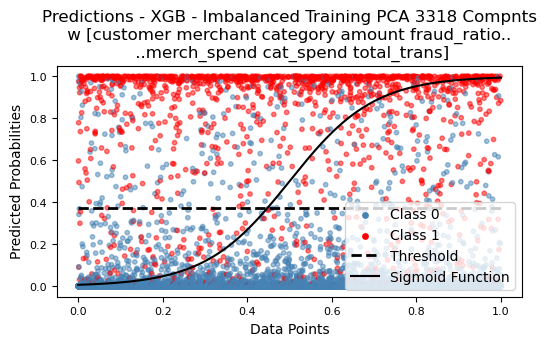

######### XGB - Imbalanced Training PCA 3318 Compnts- w [customer merchant category amount fraud_ratio.. - ..merch_spend cat_spend total_trans] #########
Confusion Matrix - Optimal Threshold = 0.374

     0    1
117173  269
   268 1219

Classification Report - Optimal Threshold = 0.374

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117442
           1       0.82      0.82      0.82      1487

    accuracy                           1.00    118929
   macro avg       0.91      0.91      0.91    118929
weighted avg       1.00      1.00      1.00    118929



In [37]:
title = f'- XGB - Imbalanced Training PCA {P.components_.shape[0]} Compnts\n w [customer merchant category amount fraud_ratio.. \n ..merch_spend cat_spend total_trans]'
full_class_report(y_test, ypred_xgb, title=title,
                  l_lim=0, u_lim=1, num_thresh=100,
                  sample0=1,
                  criterion='f1_recall_diff',
                  legend_loc='lower right', save_plot=False)

In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
num_classes = len(set(y_train['quant_cust_coef']))
params = {
    'objective': 'multi:softmax',  # For class labels, use 'multi:softprob' for probabilities
    'num_class': num_classes,
    'eval_metric': 'aucpr',
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round, verbose_eval=True)

# Make predictions
y_pred = bst.predict(dtest)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.15%


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.09      0.15       956
           1       0.64      0.01      0.02       711
           2       0.00      0.00      0.00       575
           3       0.97      1.00      0.99    115562
           4       0.00      0.00      0.00       940
           5       0.00      0.00      0.00       185

    accuracy                           0.97    118929
   macro avg       0.33      0.18      0.19    118929
weighted avg       0.95      0.97      0.96    118929



In [59]:
set(y_train['quant_cust_coef'])

1

In [70]:
def xgb_logistic_model_multi(X_train, y_train, X_test, y_test, eval_metric='mlogloss', max_depth=3, threads=4, iter=10, scale_pos_weight=None, eta=0.1, verbose=True):
    dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.NaN)
    dtest = xgb.DMatrix(X_test, label=y_test, missing=np.NaN)

    param = {
        'max_depth': max_depth,
        'eta': eta,  # Set to 0.1 for more gradual learning
        'objective': 'multi:softprob',  # Output probabilities
        'num_class': len(np.unique(y_train)),  # Ensure num_class is set for multiclass problems
        'nthread': threads,
        'eval_metric': [eval_metric]
    }

    if scale_pos_weight is not None:
        param['scale_pos_weight'] = scale_pos_weight

    evallist = [(dtrain, 'train'), (dtest, 'eval')]
    num_round = iter
    bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval=verbose)

    # Predict probabilities
    ypred_proba = bst.predict(dtest)
    # Convert probabilities to predicted classes
    ypred = np.argmax(ypred_proba, axis=1)

    return bst, ypred, ypred_proba


In [71]:
xgb_model, ypred_xgb = xgb_logistic_model_multi(X_train, y_train, X_test, y_test, eval_metric='aucpr', max_depth=3, threads=4, iter=50, verbose=True)

[0]	train-aucpr:0.20134	eval-aucpr:0.19956
[1]	train-aucpr:0.20205	eval-aucpr:0.20062
[2]	train-aucpr:0.20269	eval-aucpr:0.20127
[3]	train-aucpr:0.20395	eval-aucpr:0.20107
[4]	train-aucpr:0.20407	eval-aucpr:0.20113
[5]	train-aucpr:0.20428	eval-aucpr:0.20153
[6]	train-aucpr:0.20434	eval-aucpr:0.20174
[7]	train-aucpr:0.20502	eval-aucpr:0.20219
[8]	train-aucpr:0.20510	eval-aucpr:0.20264
[9]	train-aucpr:0.20520	eval-aucpr:0.20274
[10]	train-aucpr:0.20542	eval-aucpr:0.20273
[11]	train-aucpr:0.20544	eval-aucpr:0.20276
[12]	train-aucpr:0.20546	eval-aucpr:0.20286
[13]	train-aucpr:0.20552	eval-aucpr:0.20295
[14]	train-aucpr:0.20551	eval-aucpr:0.20291
[15]	train-aucpr:0.20559	eval-aucpr:0.20290
[16]	train-aucpr:0.20553	eval-aucpr:0.20290
[17]	train-aucpr:0.20556	eval-aucpr:0.20287
[18]	train-aucpr:0.20556	eval-aucpr:0.20281
[19]	train-aucpr:0.20550	eval-aucpr:0.20271
[20]	train-aucpr:0.20557	eval-aucpr:0.20278
[21]	train-aucpr:0.20562	eval-aucpr:0.20276
[22]	train-aucpr:0.20564	eval-aucpr:0.2028

ValueError: too many values to unpack (expected 2)